## Ex 3: Drag in a uniform atmosphere

In [41]:
import matplotlib.pyplot as plt
from space_base import GravBody, Probe
from numpy import max, argmax

# Constants
G = 6.67e-11  # Gravitational constant
earth = GravBody.earth()  # Earth as an object with mass and radius
gravity = 9.81  # simple gravity

# Initial Conditions
x0 = 0  # start position
vx0 = 850  # start vertical speed
t_num = 1400  # number of steps in trajectory

We are going to implement the drag force in our simulation as a force that oppose to the speed vector. And expressed as follows:
$$F_{drag}=-\frac{C_D}{2}\rho A V^2\hat{V}$$
Where, $\hat{V}$ is a unit vector in the direction of motion.

In [42]:
def projectile(t, posvel):
    cd=1.0
    A=0.01
    mass=1.0
    Density=1.217

    current_gravity = gravity
    drag_force = -0.5 * cd * A * Density * abs(posvel[1]) * posvel[1]

    return posvel[1], -current_gravity + drag_force / mass

# Running Solver
t_final = 200  # time of trajectory given
probe = Probe(projectile, t_final, t_num, x0=x0, vx0=vx0, event=0)  # probe as an object
t, posvel = probe.odesolve()  # solve the differential equations
max(posvel, axis=0)[0]

501.82375447515403

This is the maximum height acheive with drag in meters.

In [43]:
t[len(t)-1]

21.58684774839171

This is the time of flight in seconds. We immediatly saw that it is way more faster than previous flights and that the apoapsis is way lower. This tell us that in dense atmosphere, drag plays an important part of motion.

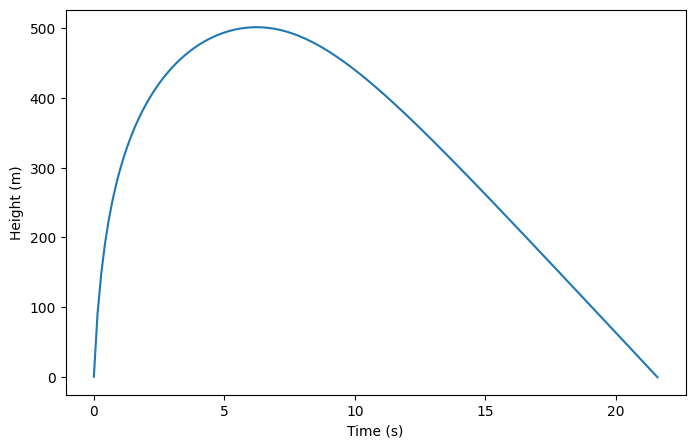

In [44]:
# Plotting
plt.figure(figsize=(8, 5))  # create figure, figsize can be changed as preferred
plt.plot(t, posvel[:, 0])  # plot time against height
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()  # make plot appear

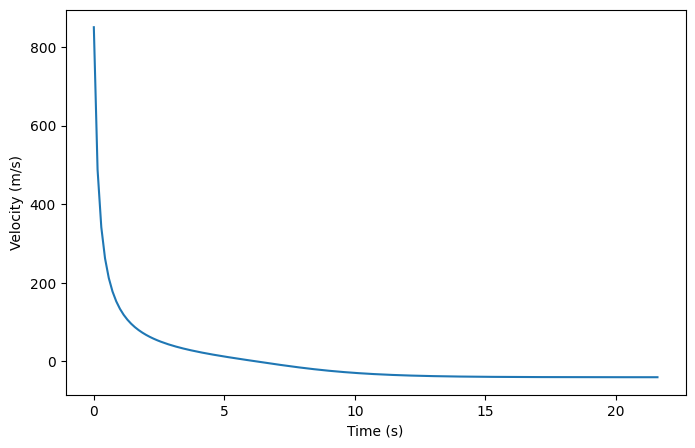

In [45]:
# Plotting
plt.figure(figsize=(8, 5))  # create figure, figsize can be changed as preferred
plt.plot(t, posvel[:, 1])  # plot time against height
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()  # make plot appear

We clearly see that the projectile is slowed very quickly. Then, after reaching its apoapsis it enters a free fall state where the falling velocity will converge to what we can wall the terminate velocity of the projectile. This velocity is the maximum velocity that the projectile can reach in free fall because of the drag that equilibrate with the gravity at some speed.

In [46]:
t_end = len(t) - 1
in_energy = 0.5 * probe.mass * posvel[0][1] ** 2 + probe.mass * gravity * posvel[0][0]  # initial energy
fin_energy = 0.5 * probe.mass * posvel[t_end][1] ** 2 + probe.mass * gravity * posvel[t_end][0]  # final energy
error_percentage = 100 * abs((fin_energy - in_energy) / in_energy)
error_percentage

99.77927256193624

Here, we see that energy is no longer conserved. This is because energy is lost due to the drag force. In fact, this force consumme energy by for example convert it to heat. This is why at huge speed drag can cause major heat problematics.